<h3> Premier graphique: </h3>

0        5974
1        9393
2        2810
3        6694
4        9459
        ...  
9995    10311
9996     4204
9997     7116
9998     6269
9999    10800
Name: activité_groupes, Length: 10000, dtype: int64
La covariance est de : -146882.79359027903


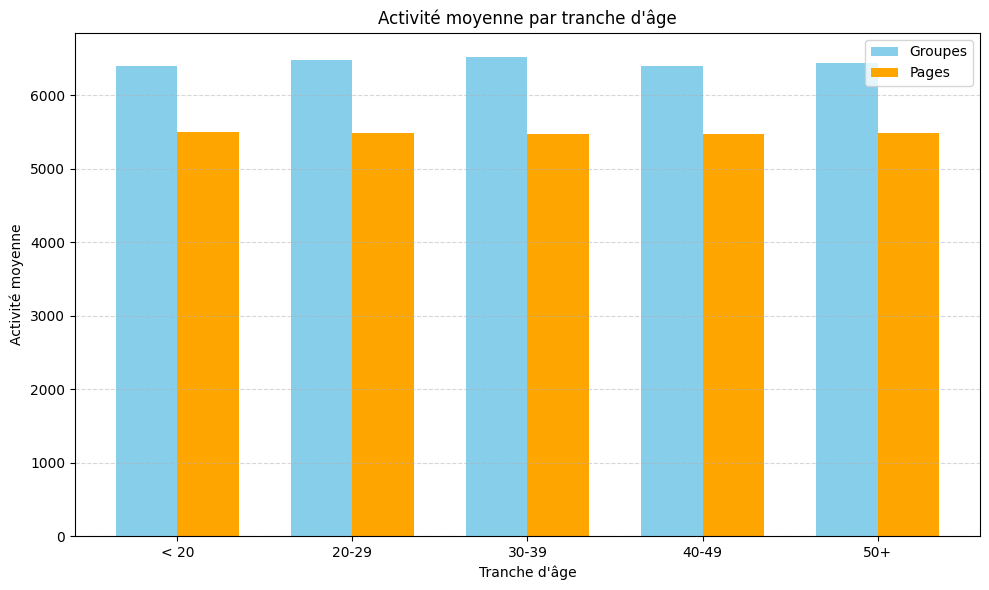

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("data.xlsx") # on ouvre le fichier

df.columns = df.columns.str.strip() # on enlève les espaces au début et à la fin pour chaques noms de colonne.
df.columns = [col.split()[0] for col in df.columns] # on retient uniquement les lettres au début des noms pour chaques colonnes (pour simplifier la suite)

# on a modifié les noms des colonnes pour, simplifié ce qu'on souhaite
colonnes_groupes = ["V", "X", "Y", "Z", "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI"]
colonnes_pages = ["AJ", "AL", "AM", "AN", "AO", "AP", "AQ"]

# on défini les tranches d'âge
def tranche_age(age):
    if age < 20:
        return "< 20"
    elif age < 30:
        return "20-29"
    elif age < 40:
        return "30-39"
    elif age < 50:
        return "40-49"
    else:
        return "50+"

df["Tranche âge"] = df["G"].apply(tranche_age) # on applique la fonction 'tranche_age' pour chaque valeur de notre colonne "G" (donc âge)

# on calcul les scores d'activités
df["activité_groupes"] = df[colonnes_groupes].sum(axis=1)
print(df["activité_groupes"])
df["activité_pages"] = df[colonnes_pages].sum(axis=1)

# la moyenne par tranche d'âge
df_grouped = df.groupby("Tranche âge")[["activité_groupes", "activité_pages"]].mean().reindex(["< 20", "20-29", "30-39", "40-49", "50+"])

# le ptit tacé
x = np.arange(len(df_grouped.index))
largeur = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - largeur/2, df_grouped["activité_groupes"], width=largeur, label="Groupes", color="skyblue")
plt.bar(x + largeur/2, df_grouped["activité_pages"], width=largeur, label="Pages", color="orange")

cov = np.cov(df["activité_groupes"], df["activité_pages"])[0, 1]
print("La covariance est de :", cov) # cov = -146882.79359027903

# pour que ce soit compréhensible 
plt.xticks(x, df_grouped.index)
plt.xlabel("Tranche d'âge")
plt.ylabel("Activité moyenne")
plt.title("Activité moyenne par tranche d'âge")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<h3> Deuxième graphique: </h3>

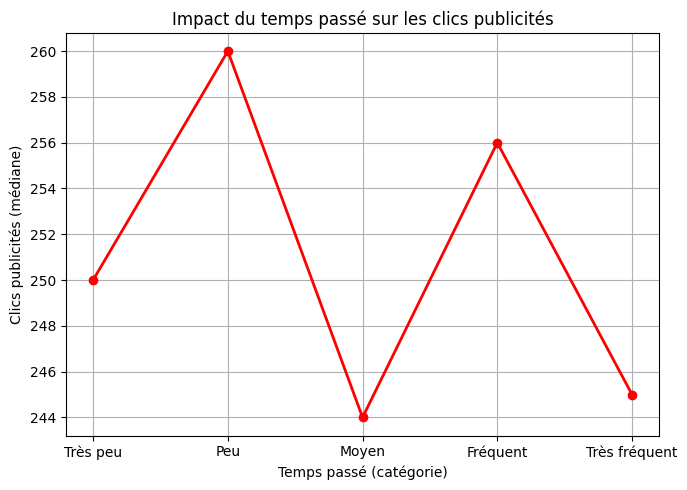

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# IMPORT EXCEL + CALCUL
df = pd.read_excel("data.xlsx", sheet_name="Data")
df.columns = df.columns.str.strip()
# Ici la recherche est comme sa car quand je mettais le nom de la colone il l'a trouvé pas...
col_temps = [col for col in df.columns if "temps" in col.lower()][0]
col_clics = [col for col in df.columns if "clics" in col.lower()][0]
#Pour catégoriser le temps
def categorie_temps(t):
    if t < 20:
        return "Très peu"
    elif t < 40:
        return "Peu"
    elif t < 60:
        return "Moyen"
    elif t < 80:
        return "Fréquent"
    else:
        return "Très fréquent"

df["Catégorie temps"] = df[col_temps].apply(categorie_temps)

# Calcul de la médiane
mediane = df.groupby("Catégorie temps")[col_clics].median()
ordre_categories = ["Très peu", "Peu", "Moyen", "Fréquent", "Très fréquent"]
mediane = mediane.reindex(ordre_categories)

# Graphhique
plt.figure(figsize=(7, 5))
plt.plot(mediane.index, mediane.values, marker='o', color='red', linewidth=2)
plt.title("Impact du temps passé sur les clics publicités")
plt.xlabel("Temps passé (catégorie)")
plt.ylabel("Clics publicités (médiane)")
plt.grid(True)
plt.tight_layout()
plt.show()

<h3>Troisième graphique:</h3>

Statistiques entre   A (Likes)   et  Vues de vidéos  sur le réseau 
- Moyenne   A (Likes)   :  501.3293
- Moyenne  Vues de vidéos  :  23407494.10396581
- Variance   A (Likes)   :  81625.45640715072
- Variance  Vues de vidéos  :  4970127122059067.0
- Covariance : 10462507165.64
- Corrélation de Pearson : 0.52


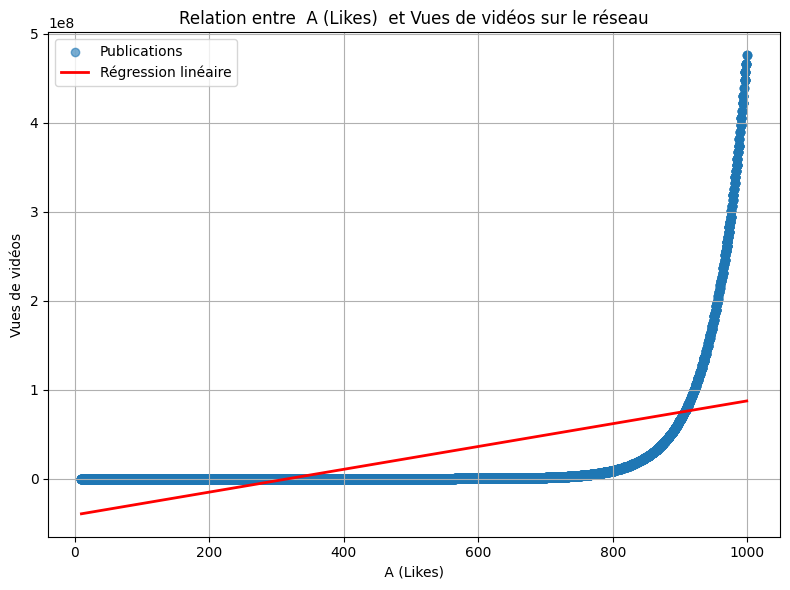

Statistiques entre   C (Commentaires)   et  Nouveaux utilisateurs   sur le réseau 
- Moyenne   C (Commentaires)   :  99.8593
- Moyenne  Nouveaux utilisateurs   :  150.86942109988456
- Variance   C (Commentaires)   :  3242.4625497649763
- Variance  Nouveaux utilisateurs   :  4066.6716371362613
- Covariance : 3257.43
- Corrélation de Pearson : 0.90


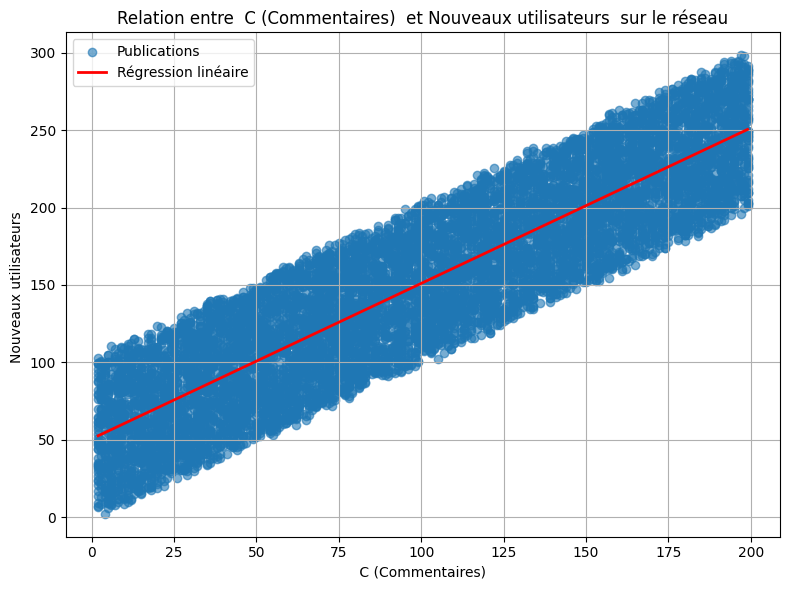

Statistiques entre   D (Nouveaux utilisateurs)   et  Nouveaux utilisateurs   sur le réseau 
- Moyenne   D (Nouveaux utilisateurs)   :  254.8256
- Moyenne  Nouveaux utilisateurs   :  150.86942109988456
- Variance   D (Nouveaux utilisateurs)   :  19655.568141454147
- Variance  Nouveaux utilisateurs   :  4066.6716371362613
- Covariance : 3997.09
- Corrélation de Pearson : 0.45


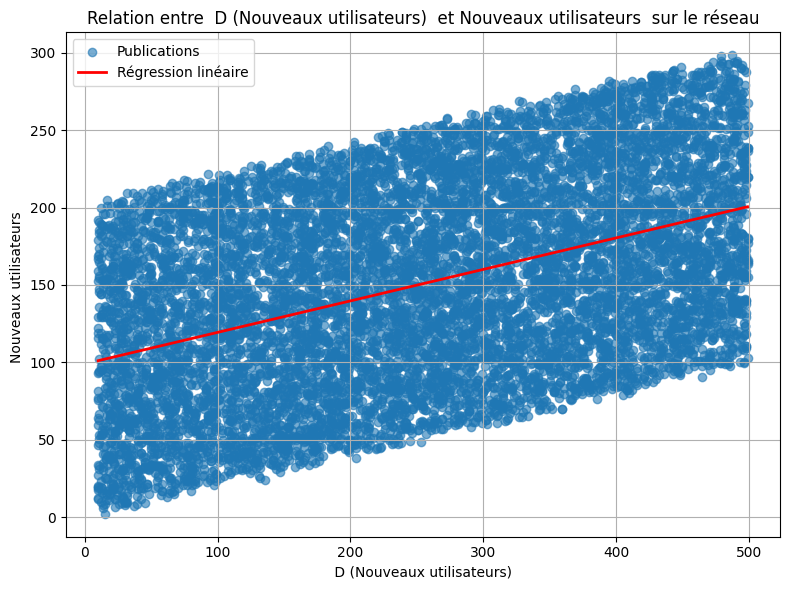

Statistiques entre  Likes en fonction des partages  et  Commentaires  sur le réseau 
- Moyenne  Likes en fonction des partages  :  5251.256425597067
- Moyenne  Commentaires  :  758.0787480317791
- Variance  Likes en fonction des partages  :  8348183.0305884
- Variance  Commentaires  :  96371.01816867622
- Covariance : 836719.28
- Corrélation de Pearson : 0.93


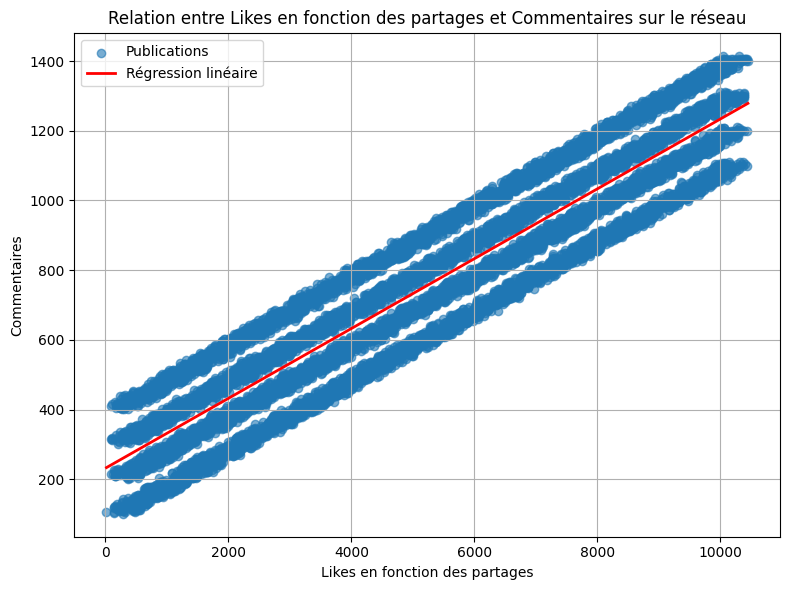

Statistiques entre  Likes en fonction des partages  et  Engagement estimé  sur le réseau 
- Moyenne  Likes en fonction des partages  :  5251.256425597067
- Moyenne  Engagement estimé  :  5759.840285830178
- Variance  Likes en fonction des partages  :  8348183.0305884
- Variance  Engagement estimé  :  8422311.457189247
- Covariance : 8368610.37
- Corrélation de Pearson : 1.00


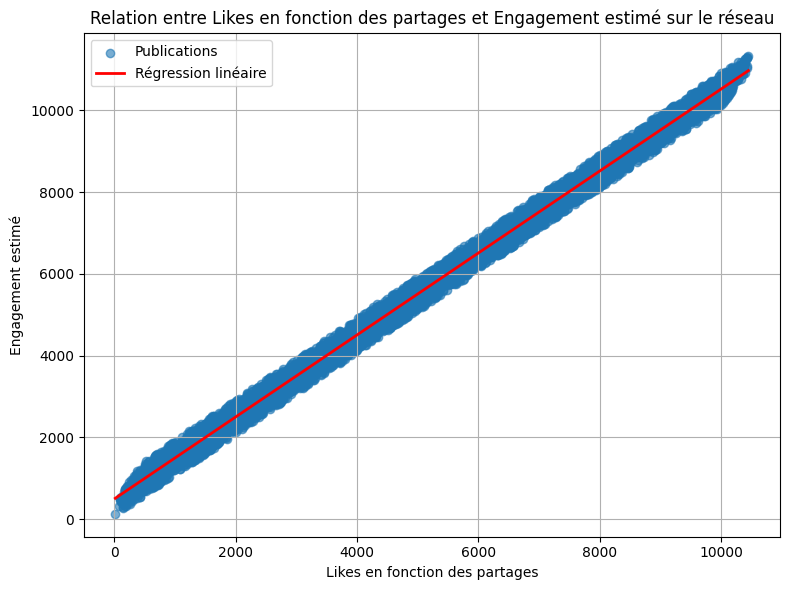

Statistiques entre  Commentaires  et  Engagement estimé  sur le réseau 
- Moyenne  Commentaires  :  758.0787480317791
- Moyenne  Engagement estimé  :  5759.840285830178
- Variance  Commentaires  :  96371.01816867622
- Variance  Engagement estimé  :  8422311.457189247
- Covariance : 849263.20
- Corrélation de Pearson : 0.94


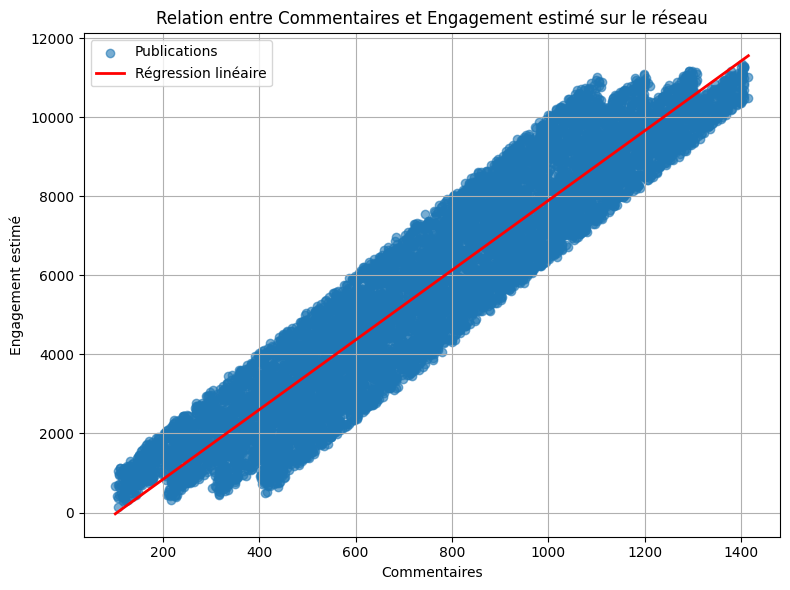

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math


#Ce code génére plusieurs graphiques qui remplissent des conditions de corrélation. Nous avons ensuite choisi de manière arbitraire quel graphique pourrait nous intéresser

# pour calculer les corrélations
def cor(df,c, d) :
    col1 = df[c]
    col2 = df[d]
    #    Statistiques : Moyennes
    moy_col1 = statistics.mean(col1)
    moy_col2 = statistics.mean(col2)
    #    Variances
    var_col1 = statistics.variance(col1)
    var_col2 = statistics.variance(col2)
    #    Covariance
    covariance = sum((x - moy_col1) * (y - moy_col2) for x, y in zip(col1, col2)) / (len(col1) - 1)
    #    Corrélation (Pearson)
    ecart_type_col1 = math.sqrt(var_col1)
    ecart_type_col2 = math.sqrt(var_col2)
    correlation = covariance / (ecart_type_col1 * ecart_type_col2)
    
    return correlation
#on lit le excel
df = pd.read_excel("data.xlsx", sheet_name="Data")

#on récupère les colonnes du excel
k = [" A (Likes) "," B (Partages) "," C (Commentaires) "," D (Nouveaux utilisateurs) "," E (Temps passé) "," F (Sexe) "," G (Âge) "," H (Localisation) "," I (Niveau d'éducation) "," J (Type d'abonnement) ","Likes en fonction des partages"," K (Messages privés) "," L (Notifications) "," M (Publications) "," N (Réactions) "," O (Vues de vidéos) "," P (Clics publicités) "," Q (Suivis) "," R (Mentions J'aime) "," S (Partages de liens) "," T (Téléchargements) "," U (Participations événements) "," V (Créations de groupes) "," W (Membres dans groupes) "," X (Publications dans groupes) "," Y (Réactions dans groupes) "," Z (Messages dans groupes) "," AA (Partages dans groupes) "," AB (Commentaires dans groupes) "," AC (Vues de vidéos dans groupes) "," AD (Clics publicités dans groupes) ","Vues de vidéos"," AE (Suivis dans groupes) "," AF (Mentions J'aime dans groupes) "," AG (Partages de liens dans groupes) "," AH (Téléchargements dans groupes) "," AI (Participations événements dans groupes) "," AJ (Créations de pages) "," AK (Membres sur pages) "," AL (Publications sur pages) "," AM (Réactions sur pages) "," AN (Messages sur pages) "," AO (Partages sur pages) "," AP (Commentaires sur pages) "," AQ (Vues de vidéos sur pages) ","Commentaires","Nouveaux utilisateurs ","Engagement estimé"]
#on a dégagé le Id pcq il sert à rien mtn on dégage les colonnes sans valeurs numériques
i=0
while i < len(k) :
    if isinstance(df[k[i]][0],str) :
        k.pop(i)
        i-=1
    i+=1
    
#mtn on récupère les noms et le coef de pearson pour les colonnes dont ce dernier est > 0.4
val =[]
noms = []
for i in range (len((k))) :
    for j in range (len(k)) :
        if j!=i and not ((k[j],k[i]) in noms):
            r = cor(df,k[i],k[j])
            if r > 0.4 :
                val.append(r)
                noms.append((k[i],k[j]))
#Mtn pour chacun des couples de colonnes on fait un nuage de points et on montre ses statistiques précises
def stt(df,c, d) :
    ages = df[c]
    temps_passe = df[d]
    #    Statistiques : Moyennes

    moy_age = statistics.mean(ages)
    moy_temps = statistics.mean(temps_passe)

    #    Variances

    var_age = statistics.variance(ages)
    var_temps = statistics.variance(temps_passe)

    #    Covariance

    covariance = sum((x - moy_age) * (y - moy_temps) for x, y in zip(ages, temps_passe)) / (len(ages) - 1)

    #    Corrélation (Pearson)

    ecart_type_age = math.sqrt(var_age)
    ecart_type_temps = math.sqrt(var_temps)
    correlation = covariance / (ecart_type_age * ecart_type_temps)

    #    Affichage des résultats

    print("Statistiques entre ",c," et ",d," sur le réseau ")
    print(f"- Moyenne " ,c," : ",moy_age)
    print(f"- Moyenne ",d," : ",moy_temps )
    print(f"- Variance ",c," : ",var_age)
    print(f"- Variance ",d," : ",var_temps)
    print(f"- Covariance : {covariance:.2f}")
    print(f"- Corrélation de Pearson : {correlation:.2f}")
    return None


def nuagepts(df, d, c):
    # Extraire les colonnes nécessaires
    data = df[[d, c]].dropna()
    x = data[d].tolist()
    y = data[c].tolist()

    # Calcul des coefficients de régression linéaire y = ax + b
    moy_x = statistics.mean(x)
    moy_y = statistics.mean(y)
    var_x = statistics.variance(x)
    cov_xy = sum((xi - moy_x) * (yi - moy_y) for xi, yi in zip(x, y)) / (len(x) - 1)
    
    a = cov_xy / var_x
    b = moy_y - a * moy_x

    # Génération des points pour la droite
    x_line = sorted(x)
    y_line = [a * xi + b for xi in x_line]

    # Tracer le nuage de points
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6, label="Publications")
    plt.plot(x_line, y_line, color='red', linewidth=2, label="Régression linéaire")

    plt.xlabel(d)
    plt.ylabel(c)
    plt.title(f"Relation entre {d} et {c} sur le réseau")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
#le graphe et stat pour chaque couple de noms
for x,y in noms :
    stt(df,x,y)
    nuagepts(df,x,y)


<h3>Script python pour le peuplement des tables:</h3> 

In [13]:
import pandas as pd
from datetime import datetime, timedelta
import random

# Charger le fichier Excel
df = pd.read_excel("data.xlsx")
nb_utilisateurs = len(df)

# Ouvrir le fichier SQL pour écrire toutes les requêtes
with open("PeuplementBD.sql", "w", encoding='utf-8') as f:

    # Peuplement de la table utilisateur
    for i in range(nb_utilisateurs):
        col = df.iloc[i] #iloc est un int entre 0 et len-1
        sexe = col[" F (Sexe) "]
        age = col[" G (Âge) "]
        date_naissance = str(2025 - int(age))
        niveau = col[" I (Niveau d'éducation) "]
        abonnement = col[" J (Type d'abonnement) "]

        f.write(
            f"INSERT INTO utilisateurs VALUES (DEFAULT, '{sexe}', 'nom_user', '{date_naissance}', '{niveau}', '{abonnement}');\n"
        )

    # Peuplement de la table page
    for i in range(1, 100):
        titre = f"c_{i}"
        f.write(f"INSERT INTO page VALUES (DEFAULT,'{titre}');\n")

    # Peuplement de la table groupe
    for i in range(1, 100):
        id_createur = i
        f.write(f"INSERT INTO groupe VALUES ({id_createur}, DEFAULT);\n")

    # Peuplement de la table session
    for i in range(1, nb_utilisateurs + 1):
        annee = 2025
        mois = 1
        jour = random.randint(1, 30)
        heure_debut = random.randint(0, 23)
        debut = datetime(annee, mois, jour, heure_debut, 0, 0) #Utile pour connaitre la date de connexion
        fin = debut + timedelta(hours=random.randint(1, 3)) #Utile pour connaitre la date de déconnexion
        loc = f"Ville_{random.randint(1, 5)}"
        f.write(
            f"INSERT INTO Session VALUES (DEFAULT, '{debut}', '{fin}', '{loc}', {i});\n"
        )

    # Peuplement de la table publication
    for i in range(1, nb_utilisateurs + 1):
        id_utilisateur = i
        id_page = random.randint(1, 100)
        contenu = f"Contenu de l'utilisateur {id_utilisateur}"
        date_pub = datetime(2025, random.randint(1, 12), random.randint(1, 28)) 
        f.write(
            f"INSERT INTO publication VALUES ({id_page}, {id_utilisateur}, DEFAULT, '{contenu}', '{date_pub}');\n"
        )

    # Peuplement de la table pub
    for i in range(100):  # On simule 100 pubs
        contenu_pub = f"Contenu pub {i+1}"
        f.write(f"INSERT INTO pub VALUES (DEFAULT, '{contenu_pub}');\n")

    # Peuplement de la table réaction
    types = ["like", "partage", "commentaire", "participation"]
    for i in range(1, nb_utilisateurs + 1):
        id_page = random.randint(1, 100) #On réduit l'échantillon à 100 pages
        id_publication = i
        utilisateur_react = random.randint(1, nb_utilisateurs) #Quel utilisateur à régit ?
        type_react = random.choice(types) #Choix aléatoire dans le tableau pour la simulation
        contenu = f"Réaction de l'utilisateur {utilisateur_react}"
        f.write(
            f"INSERT INTO reaction VALUES ({id_page}, {utilisateur_react}, {id_publication}, {i}, DEFAULT, '{type_react}', '{contenu}');\n"
        )

    # Peuplement de la table rejoint
    for utilisateur in range(1, nb_utilisateurs + 1):
        groupes_rejoints = random.sample(range(1, 101), random.randint(1, 5)) #Un utilisateur rejoint ici entre 1 et 5 groupes parmi les 100 groupes possible (rend la simulation réaliste)
        for groupe in groupes_rejoints:
            f.write(f"INSERT INTO rejoint VALUES ({utilisateur}, {groupe}, {groupe});\n")

    # Peuplement de la table notification
    for i in range(1, nb_utilisateurs + 1):
        contenu = f"Notification pour utilisateur {i}"
        f.write(f"INSERT INTO Notification VALUES ({i}, DEFAULT, '{contenu}');\n")

    # Peuplement de la table message
    messages = ["Salut !", "Tu vas bien ?", "On se voit demain ?", "C’est top ça !"]
    for _ in range(100):
        exp = random.randint(1, nb_utilisateurs) #Expediteur au hasard
        dest = random.randint(1, nb_utilisateurs) #Destinataire au hasard
        contenu = random.choice(messages) #Message prégeneré aléatoire
        while dest == exp: 
            dest = random.randint(1, nb_utilisateurs) #Si par hasard on tombe sur soi même on retire un utilisateur jusqu'à ce que ça ne soit plus le cas
        f.write(f"INSERT INTO message VALUES ({exp}, {dest}, '{contenu}');\n")
        
    # Peuplement de la table clique
    for i in range(100): 
        nb_cliques = random.randint(0, 8) #On estime qu'un utilisateur cliquera entre 0 et 8 fois sur une pub durant sa session (choix aléatoire)
        pubs_cliquees = random.sample(range(1, 100 + 1), nb_cliques)
        for pub_id in pubs_cliquees:
            f.write(f"INSERT INTO clique VALUES ({i+1}, {pub_id});\n")

    # Peuplement de la table accède à
    for _ in range(1, 101):
        id_sess = random.randint(1, nb_utilisateurs)
        id_page = random.randint(1, 100)
        f.write(f"INSERT INTO Accede_a VALUES ({id_sess}, {id_page});\n")

    # Peuplement de la table administre
    for i in range(1, nb_utilisateurs + 1):
        id_utilisateur = i
        id_page = random.randint(1, 100)
        f.write(f"INSERT INTO administre VALUES ({id_utilisateur}, {id_page});\n")

    # Peuplement de la table réponse à
    for i in range(1, 100): #Echantillon de 100 publications
        if random.random() < 0.2: #20% de chances qu'une publicatgion soit une réponse (car toutes les publications ne sont pas des réponses)
            repondue = random.randint(1, 100)
            while repondue == i:
                repondue = random.randint(1, 100) #Impossible qu'une publication répondre à elle même
            f.write(f"INSERT INTO reponse_a VALUES ({repondue}, {i});\n") #répondu répond à i
